### Downstream Analysis 3
In this notebook, we analyze the results we obtained from the pearson correlation coefficients

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import pickle
from scipy.stats import spearmanr, pearsonr
import warnings
from tqdm import tqdm

In [2]:
def array_stats(arr):
    arr_min = np.min(arr)
    arr_max = np.max(arr)
    arr_mean = np.mean(arr)
    arr_median = np.median(arr)
    arr_std = np.std(arr)
    arr_variance = np.var(arr)
    arr_length = len(arr)
    print("Minimum: ", arr_min)
    print("Maximum: ", arr_max)
    print("Mean: ", arr_mean)
    print("Median: ", arr_median)
    print("Standard Deviation: ", arr_std)
    print("Variance: ", arr_variance)
    print("Length: ", arr_length)

In [49]:
pc1 = np.array([-1776.03160405,  5113.13641059, -1705.2421875 ,  1875.4731345 ,
       -1804.27766616,  -326.90456065, -1349.51725793, -1600.76801955,
        3742.5016668 ,  -463.76532787,  2820.39029319,  5508.6286909 ,
        -766.86782964, -1673.31864632,   -27.14293585, -1518.26323506,
       -1723.93632789, -1822.91907442, -1732.18919954,  -513.34666809,
       -1268.75903735,  2515.61111491,  1624.0219051 , -1796.06706955,
       -1330.44656857])

In [71]:
cluster_peusodotime = np.argsort(pc1)
cluster_peusodotime

array([17,  4, 23,  0, 18, 16,  2, 13,  7, 15,  6, 24, 20, 12, 19,  9,  5,
       14, 22,  3, 21, 10,  8,  1, 11])

In [42]:
filtered_data = np.load('/data/peer/panb2/replicate/filtered_concatenated_result_tensor.npy')
filtered_data.shape

(25, 174884318)

In [72]:
filtered_data_order = filtered_data[cluster_peusodotime]

In [73]:
filtered_data_order.shape

(25, 174884318)

In [3]:
pearson_coeff_array = np.load('/data/peer/panb2/replicate/pearson_coeff_array.npy')

In [4]:
pearson_coeff_array.shape

(174884318,)

In [5]:
array_stats(pearson_coeff_array)

Minimum:  -0.7738174128132516
Maximum:  0.9874897680316878
Mean:  0.39503034402880477
Median:  0.4296363487178603
Standard Deviation:  0.24119559019810466
Variance:  0.05817531273101204
Length:  174884318


/home/panb2/miniconda3/envs/chrom_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


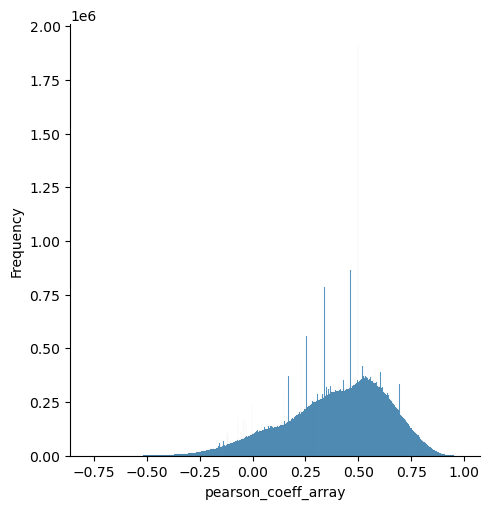

In [6]:
sns.displot(pearson_coeff_array)
plt.xlabel('pearson_coeff_array')
plt.ylabel('Frequency')
plt.show()

#### Analyze the region with the largest correlation

In [91]:
max_index = np.argmax(pearson_coeff_array)
max_value = np.max(pearson_coeff_array)

In [96]:
max_value

0.9874897680316878

In [97]:
# Find the maximum number less than or equal to each item that is a multiple of 501
max_multiple_of_501 = ((max_index // 501) * 501).astype(int)

next_501_indices = max_multiple_of_501 + np.arange(0, 501)

In [98]:
selected_region = filtered_data_order[:, next_501_indices]

In [99]:
selected_region

array([[-0.        , -0.        , -0.        , ..., -0.        ,
        -0.        , -0.        ],
       [-0.        , -0.        , -0.        , ...,  0.17547811,
         0.174803  ,  0.17544002],
       [-0.        , -0.        , -0.        , ..., -0.        ,
        -0.        , -0.        ],
       ...,
       [ 0.15411482,  0.14985193,  0.14996923, ...,  0.02827085,
         0.03900534,  0.12312393],
       [ 0.14501478,  0.14101883,  0.14110236, ...,  0.01130217,
         0.00965648,  0.06535869],
       [ 0.00265711,  0.00267273,  0.0026635 , ...,  0.03072609,
         0.03752728,  0.08163406]])

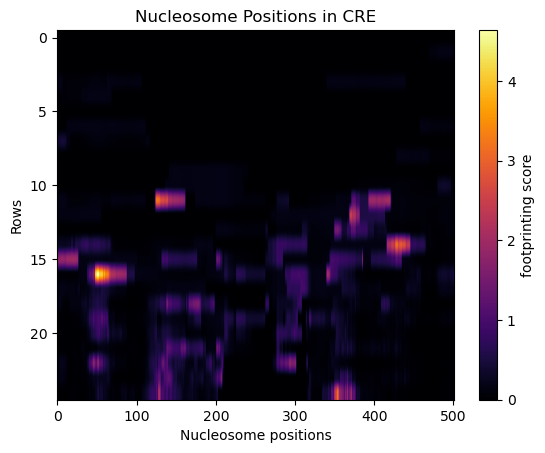

In [100]:
# Create a heatmap
plt.imshow(selected_region, cmap='inferno', aspect='auto')
plt.colorbar(label='footprinting score')
plt.xlabel('Nucleosome positions')
plt.ylabel('Rows')
plt.title('Nucleosome Positions in CRE')
plt.show()

#### Analyze top 10 regions with the largest correlations to PC1

In [101]:
top_indices = np.where(pearson_coeff_array > 0.974)
top_values = pearson_coeff_array[top_indices]

In [102]:
top_indices

(array([ 10220357,  13281463,  19426455,  26765826,  26765827,  27347815,
         27347816,  34456635,  47951399,  49403745,  49403746,  49403747,
         64172754,  64172755,  64172756,  64172757,  64805901,  77249721,
         77249722, 100071565, 100071566, 100071567, 103320851, 103320852,
        106107411, 106107412, 106107413, 106107414, 106107416, 106107420,
        106107421, 106107422, 108418814, 108418815, 114262243, 117487653,
        125055322, 125055323, 125055324, 125201076, 125201077, 125201078,
        125201079, 125201080, 134407095, 135454746, 136289689, 136289690,
        136289691, 136289692, 136289693, 136289694, 136289695, 136289696,
        136289699, 136289700, 146343394, 146343395, 149145017, 150248064,
        150248065, 154958584, 154958585, 159295869, 159295870, 159295871,
        159295872, 166392663, 172772712, 172772713]),)

In [103]:
max_multiple_of_501 = ((top_indices[0] // 501) * 501).astype(int)
max_multiple_of_501 = np.unique(max_multiple_of_501)

In [104]:
next_501_indices = max_multiple_of_501[:,np.newaxis] + np.arange(0, 501)
next_501_indices.shape

(29, 501)

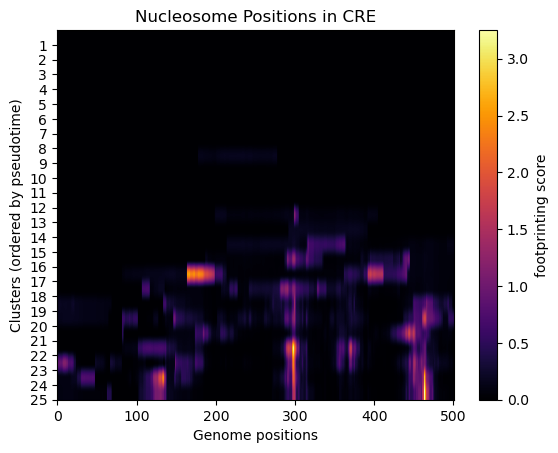

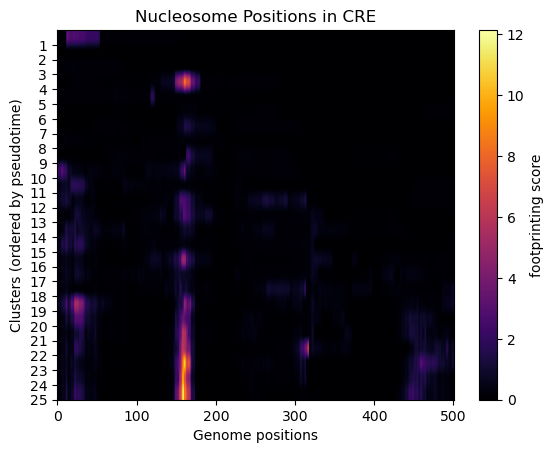

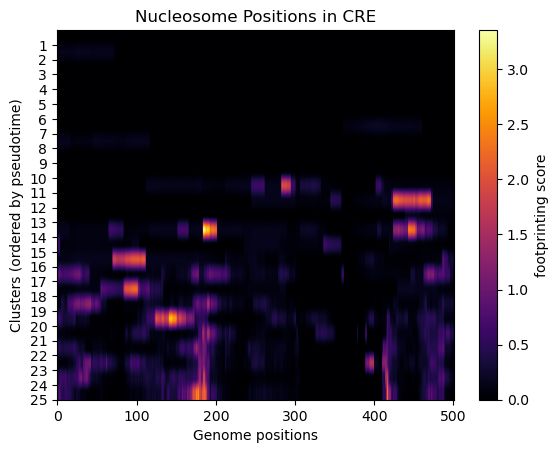

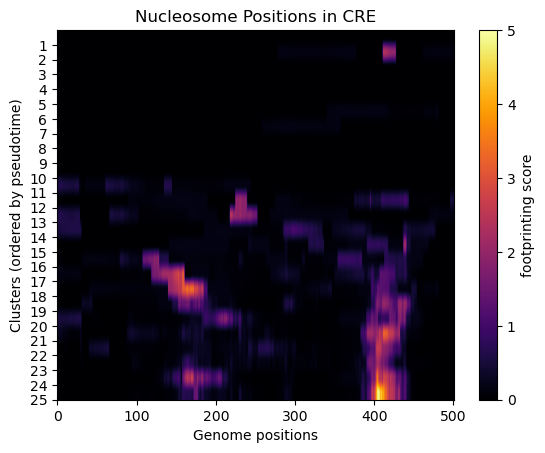

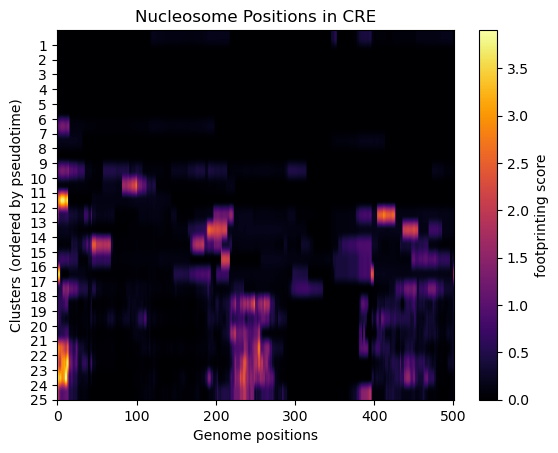

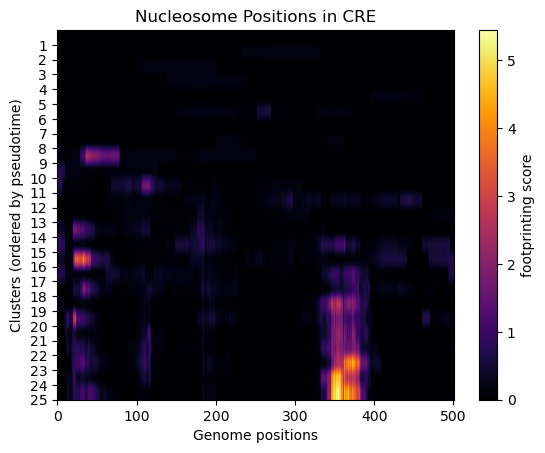

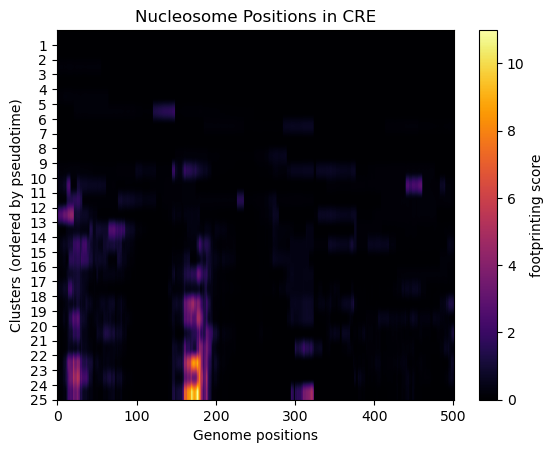

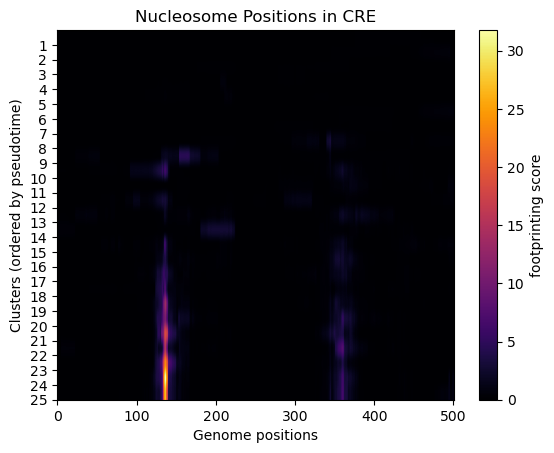

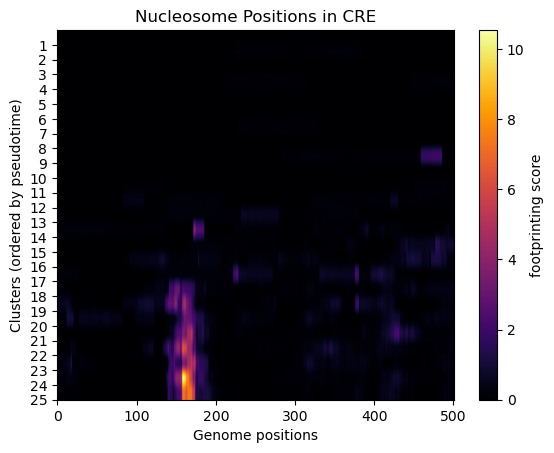

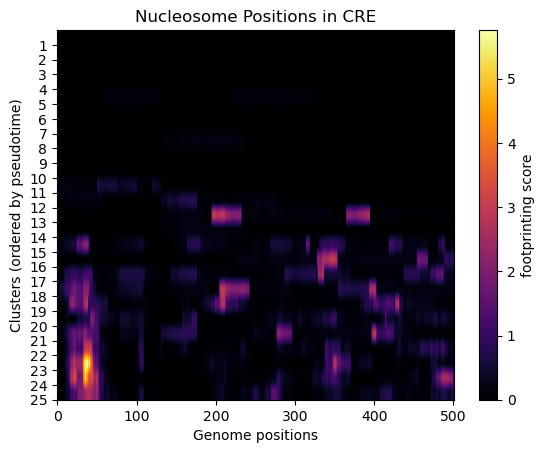

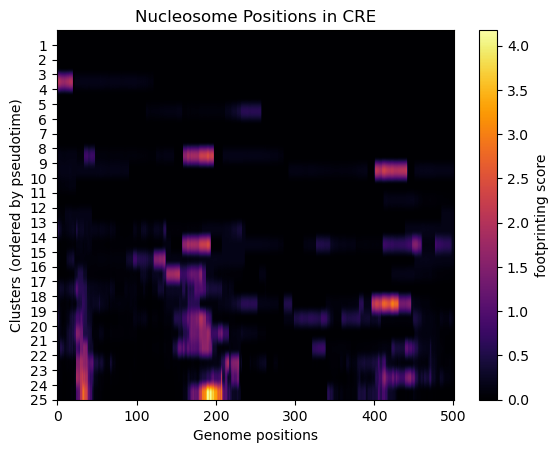

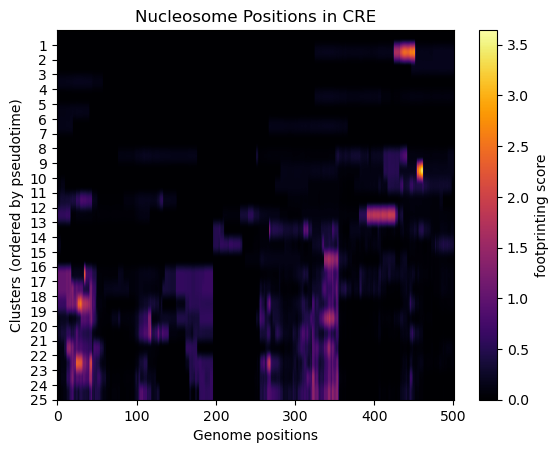

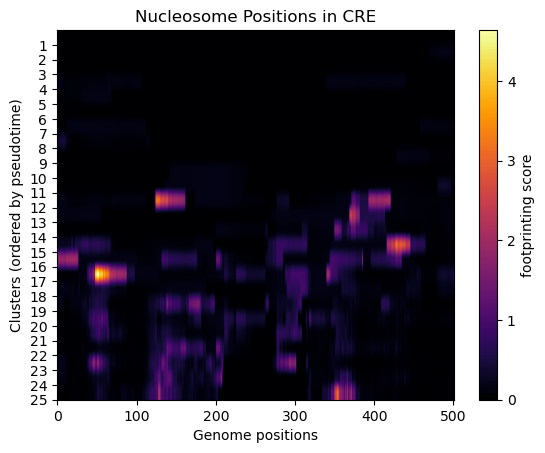

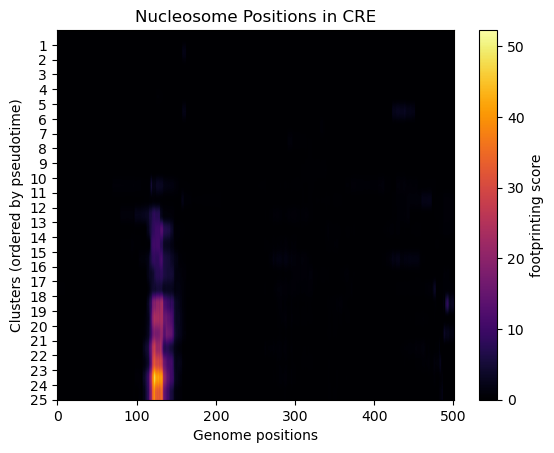

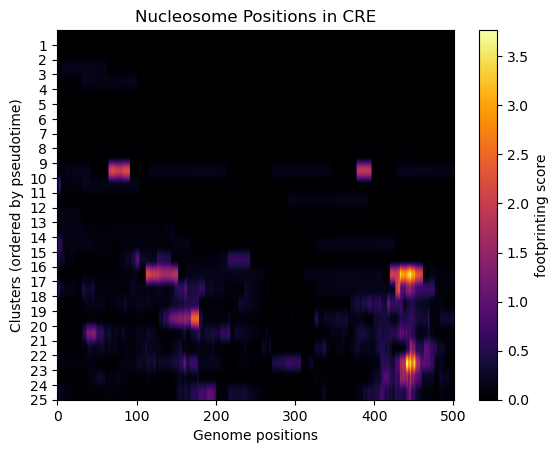

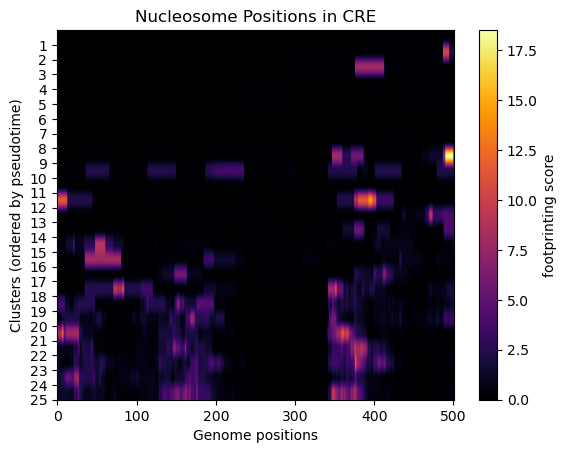

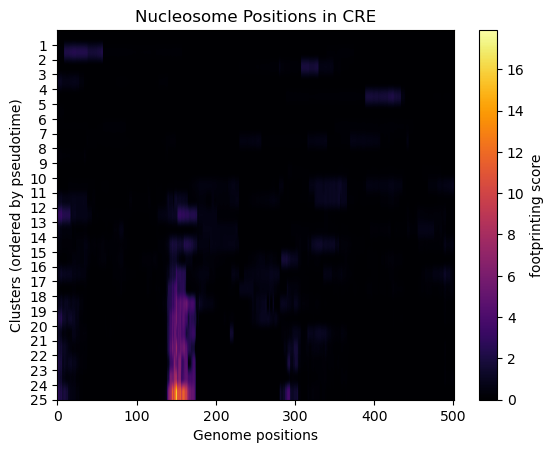

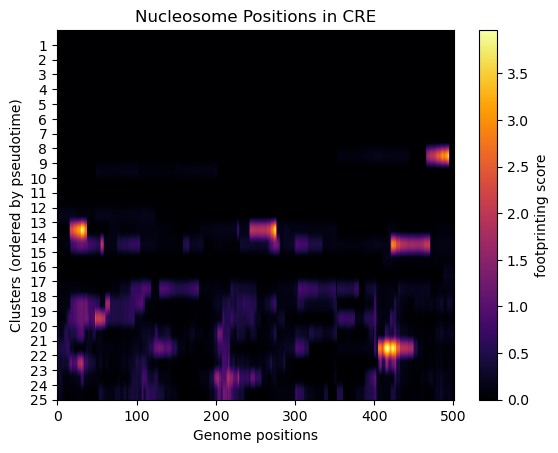

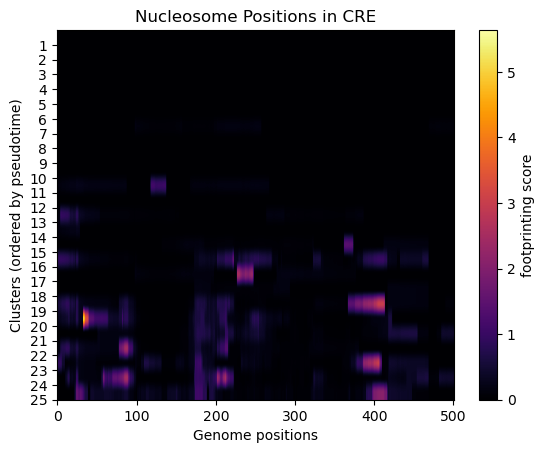

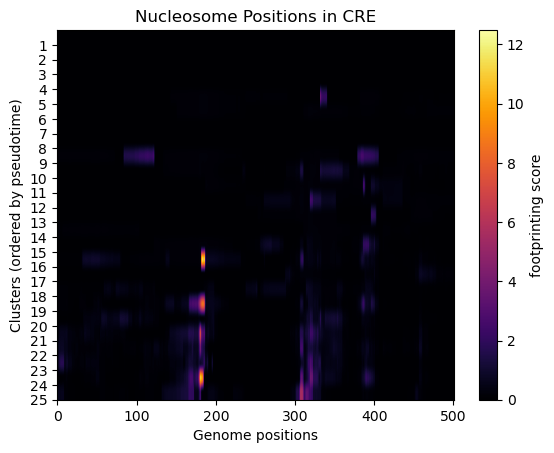

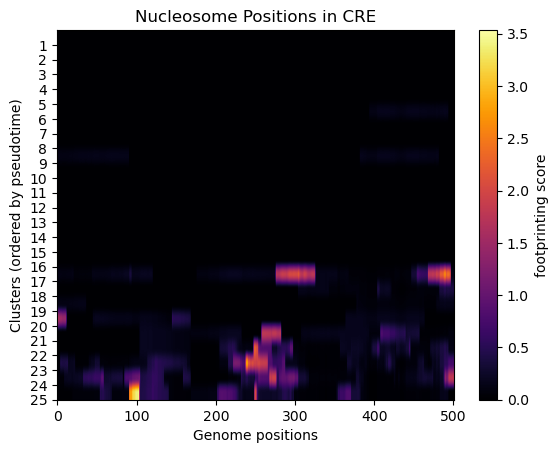

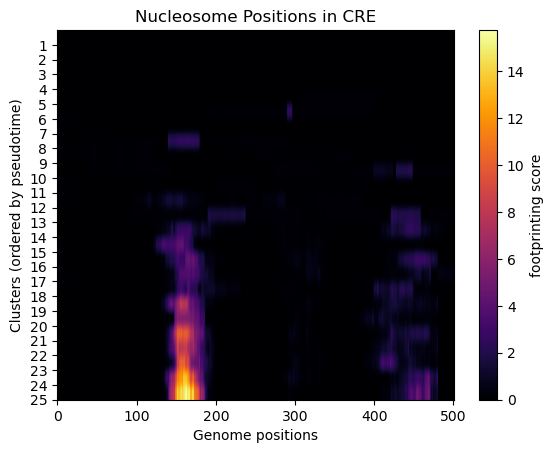

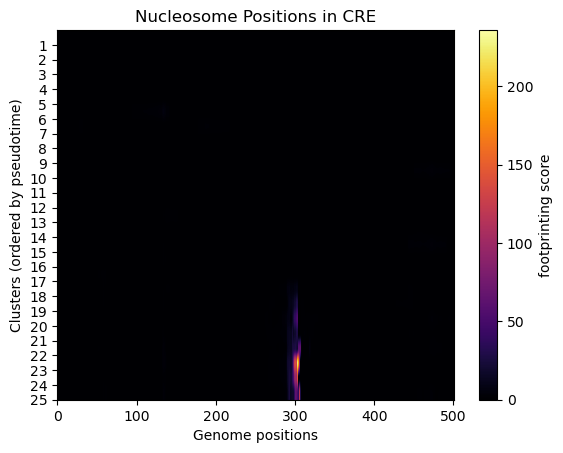

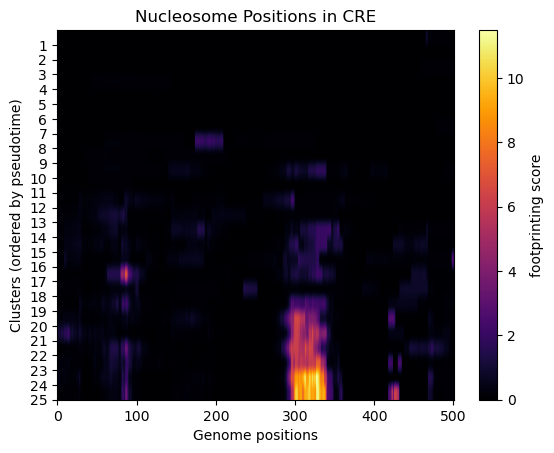

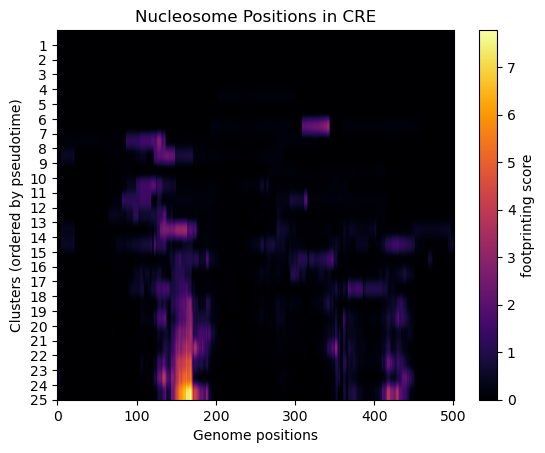

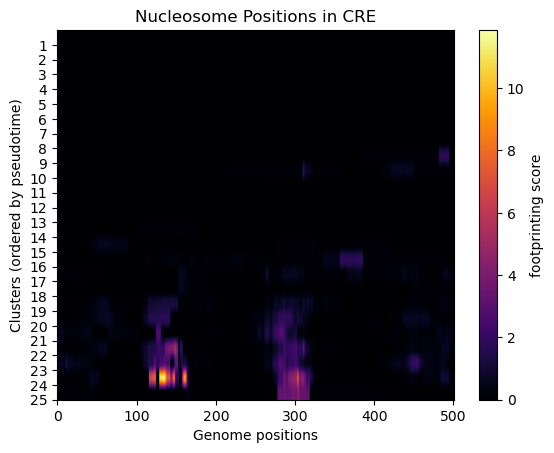

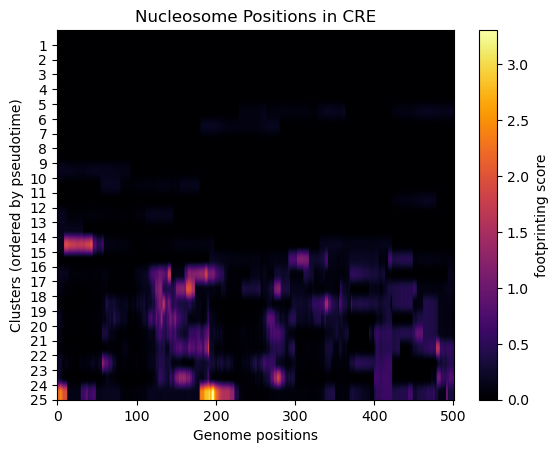

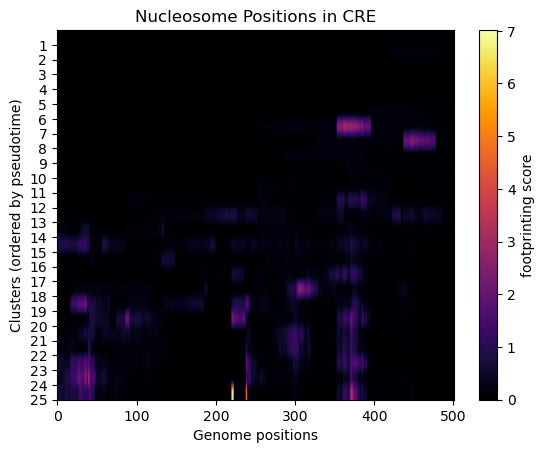

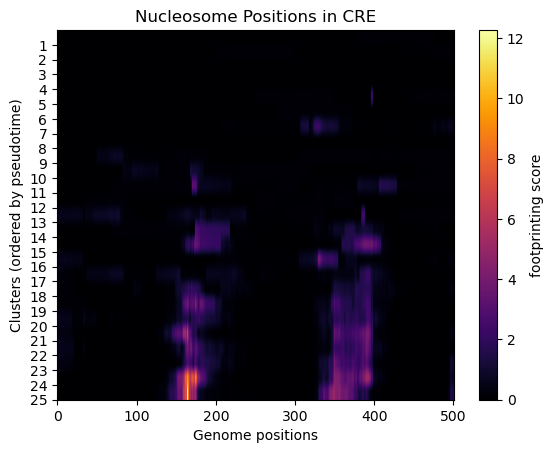

In [106]:
for i in range(next_501_indices.shape[0]):
    selected_region = filtered_data_order[:, next_501_indices[i]]
    plt.imshow(selected_region, cmap='inferno', aspect='auto')
    plt.colorbar(label='footprinting score')
    plt.xlabel('Genome positions')
    plt.ylabel('Clusters (ordered by pseudotime)')
    plt.yticks(np.arange(25) + 0.5, np.arange(1, 26))
    plt.title('Nucleosome Positions in CRE')
    plt.show()